In [25]:
%pwd

'c:\\Users\\jisna\\Downloads\\Personalized-student-Recommendations\\experiments'

In [26]:
import requests
import pandas as pd
import json  

# Replace this URL with the JSON URL from jsonkeeper.com
json_url = "https://api.jsonserve.com/XgAgFJ"

def pretty_print(data):
    """
    Pretty-print JSON data.
    """
    print(json.dumps(data, indent=4))

def save_json_to_file(data, filename):
    """
    Save JSON data to a file.
    """
    with open(filename, "w") as json_file:
        json.dump(data, json_file, indent=4)  # Save with indentation for readability
    print(f"JSON data saved to {filename}")

try:
    # Fetch the JSON data
    response = requests.get(json_url, verify=False)
    response.raise_for_status()  # Raise an exception for HTTP errors
    data = response.json()

    # Pretty-print the fetched JSON data
    pretty_print(data)

    # Save the JSON data to a file
    save_json_to_file(data, "c:\\Users\\jisna\\Downloads\\Personalized-student-Recommendations\\Data\\fetched_data.json")

except requests.exceptions.RequestException as e:
    print(f"An error occurred while fetching the JSON data: {e}")


c:\Users\jisna\anaconda3\lib\site-packages\urllib3\connectionpool.py:1061: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.jsonserve.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


[
    {
        "id": 336497,
        "quiz_id": 51,
        "user_id": "YcDFSO4ZukTJnnFMgRNVwZTE4j42",
        "submitted_at": "2025-01-17T15:30:18.027+05:30",
        "created_at": "2025-01-17T15:30:18.044+05:30",
        "updated_at": "2025-01-17T15:30:18.044+05:30",
        "score": 108,
        "trophy_level": 2,
        "accuracy": "90 %",
        "speed": "100",
        "final_score": "105.0",
        "negative_score": "3.0",
        "correct_answers": 27,
        "incorrect_answers": 3,
        "source": "exam",
        "type": "topic",
        "started_at": "2025-01-17T15:18:30.000+05:30",
        "ended_at": "2025-01-17T15:30:15.000+05:30",
        "duration": "15:00",
        "better_than": 107,
        "total_questions": 100,
        "rank_text": "Topic Rank - #-171",
        "mistakes_corrected": 9,
        "initial_mistake_count": 12,
        "response_map": {
            "2523": 10109,
            "2529": 10130,
            "2533": 10149,
            "2534": 10151,
     

In [27]:
import pandas as pd

# Extract relevant fields
records = []
for record in data:
    flat_record = {
        "user_id": record["user_id"],
        "submitted_at": record["submitted_at"],
        "quiz_id": record["quiz_id"],
        "quiz_title": record["quiz"]["title"],
        "topic": record["quiz"]["topic"],
        "difficulty_level": record["quiz"]["difficulty_level"],
        "total_questions": record["total_questions"],
        "correct_answers": record["correct_answers"],
        "incorrect_answers": record["incorrect_answers"],
        "score": record["score"],  
        "accuracy_percent": float(record["accuracy"].strip(" %")),
        "negative_marks": float(record["quiz"]["negative_marks"]),
        "correct_answer_marks": float(record["quiz"]["correct_answer_marks"]),
        "max_mistake_count": record["quiz"]["max_mistake_count"],
    }
    # Calculate derived metrics
    flat_record["total_score_possible"] = (
        flat_record["total_questions"] * flat_record["correct_answer_marks"]
    )
    flat_record["total_negative_score"] = (
        flat_record["incorrect_answers"] * flat_record["negative_marks"]
    )
    flat_record["performance_gap"] = (
        flat_record["total_score_possible"] - flat_record["score"]
    )
    flat_record["mistakes_allowed_left"] = (
        flat_record["max_mistake_count"] - flat_record["incorrect_answers"]
    )
    records.append(flat_record)

# Create a DataFrame
df = pd.DataFrame(records)

# Save the DataFrame to CSV
df.to_csv("..\\Data\\student_performance.csv", index=False)

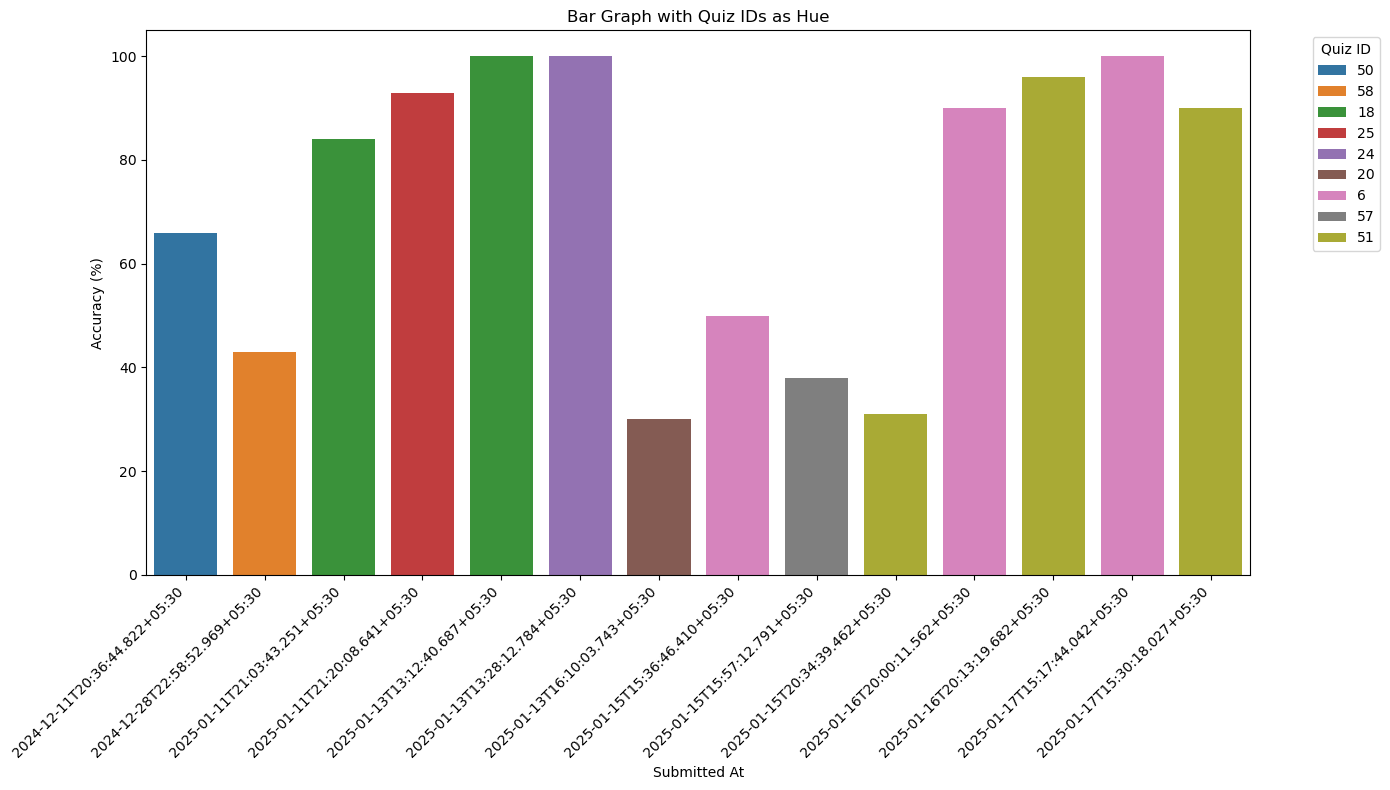

In [28]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Read the CSV file
df = pd.read_csv("..\\Data\\student_performance.csv")

# Convert quiz_id to a categorical variable (string)
df["quiz_id"] = df["quiz_id"].astype(str)
df = df.sort_values(by="submitted_at")

# Set the figure size
plt.figure(figsize=(14, 8))  # Width=14, Height=8

# Plot the bar graph with 'sumitted_at' on the x-axis, 'accuracy_percent' on the y-axis, and 'quiz_id' as hue
sns.barplot(data=df, x="submitted_at", y="accuracy_percent", hue="quiz_id",dodge=False)

# Add labels and title
plt.xlabel("Submitted At")
plt.ylabel("Accuracy (%)")
plt.title("Bar Graph with Quiz IDs as Hue")

# Rotate the x-axis labels
plt.xticks(rotation=45, ha="right")  # Rotate 45 degrees with right alignment

# Adjust the legend position and font size
plt.legend(title="Quiz ID", bbox_to_anchor=(1.05, 1), loc='upper left', fontsize='medium')

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plot
plt.show()


The visualization above shows that same quiz taken multiple times has imporved accuaracy. May be the student tried memorize the answers. 
Quiz with quiz_id =6 , quiz_id = 18 and also quiz_id =18. We will visualize the reponse_map to see if the student is trying to answer the same questions or different questions from the same quiz to see if he/she is understanding the mistakes and improving on that.

Now we try to extract the response_map for the quizzes taken multiple times to see if the student has answered the same questions for all attempts.

In [29]:
df = pd.DataFrame(data)

# Filter for  quizzes taken multiple times ( 51, 6, and 18)
filtered_df = df[df["quiz_id"].isin([51, 6, 18])]

# Convert `submitted_at` to datetime for sorting
filtered_df["submitted_at"] = pd.to_datetime(filtered_df["submitted_at"])

# Sort by `submitted_at` in ascending order
sorted_df = filtered_df.sort_values(by="submitted_at")

# Extract the `quiz_id`, `submitted_at`, and `response_map`
output_df = sorted_df[["quiz_id", "submitted_at", "response_map"]]

# Save the result to a CSV file
output_df.to_csv("..\\Data\\quiz_response_maps.csv", index=False)




C:\Users\jisna\AppData\Local\Temp\ipykernel_14536\168675337.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df["submitted_at"] = pd.to_datetime(filtered_df["submitted_at"])


In [30]:
output_df.head()

,quiz_id,submitted_at,response_map
11,18,2025-01-11 21:03:43.251000+05:30,"{'611': 2447, '612': 2451, '613': 2454, '614':..."
9,18,2025-01-13 13:12:40.687000+05:30,"{'612': 2451, '613': 2454, '614': 2460, '619':..."
6,6,2025-01-15 15:36:46.410000+05:30,"{'48': 193, '49': 197, '50': 202, '51': 203, '..."
4,51,2025-01-15 20:34:39.462000+05:30,"{'2521': 10099, '2523': 10107, '2532': 10145, ..."
3,6,2025-01-16 20:00:11.562000+05:30,"{'49': 197, '52': 208, '53': 212, '54': 217, '..."


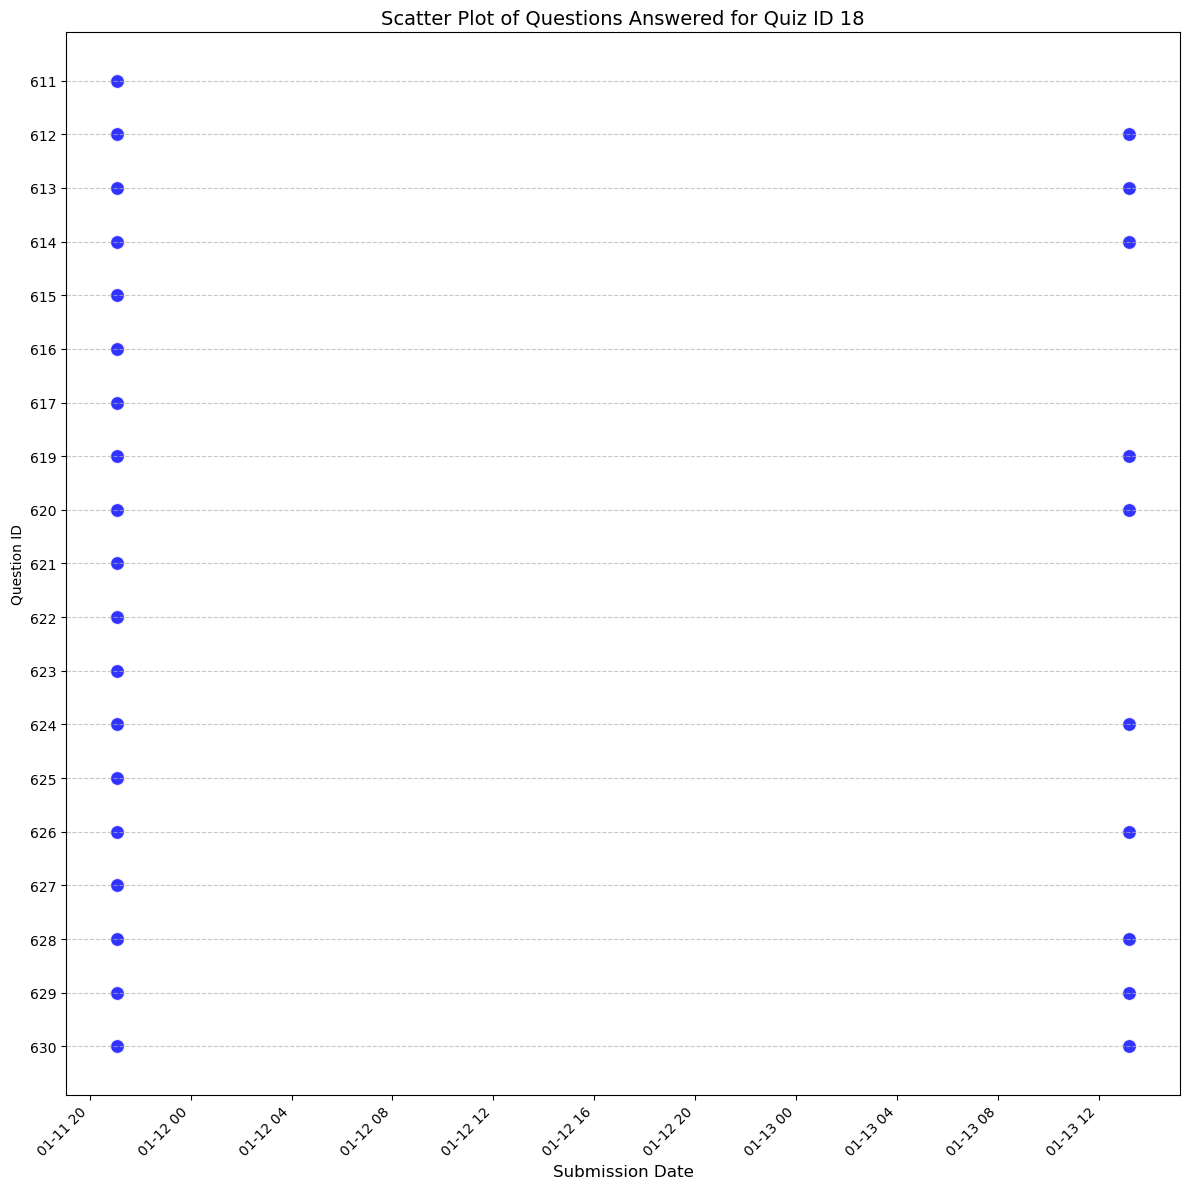

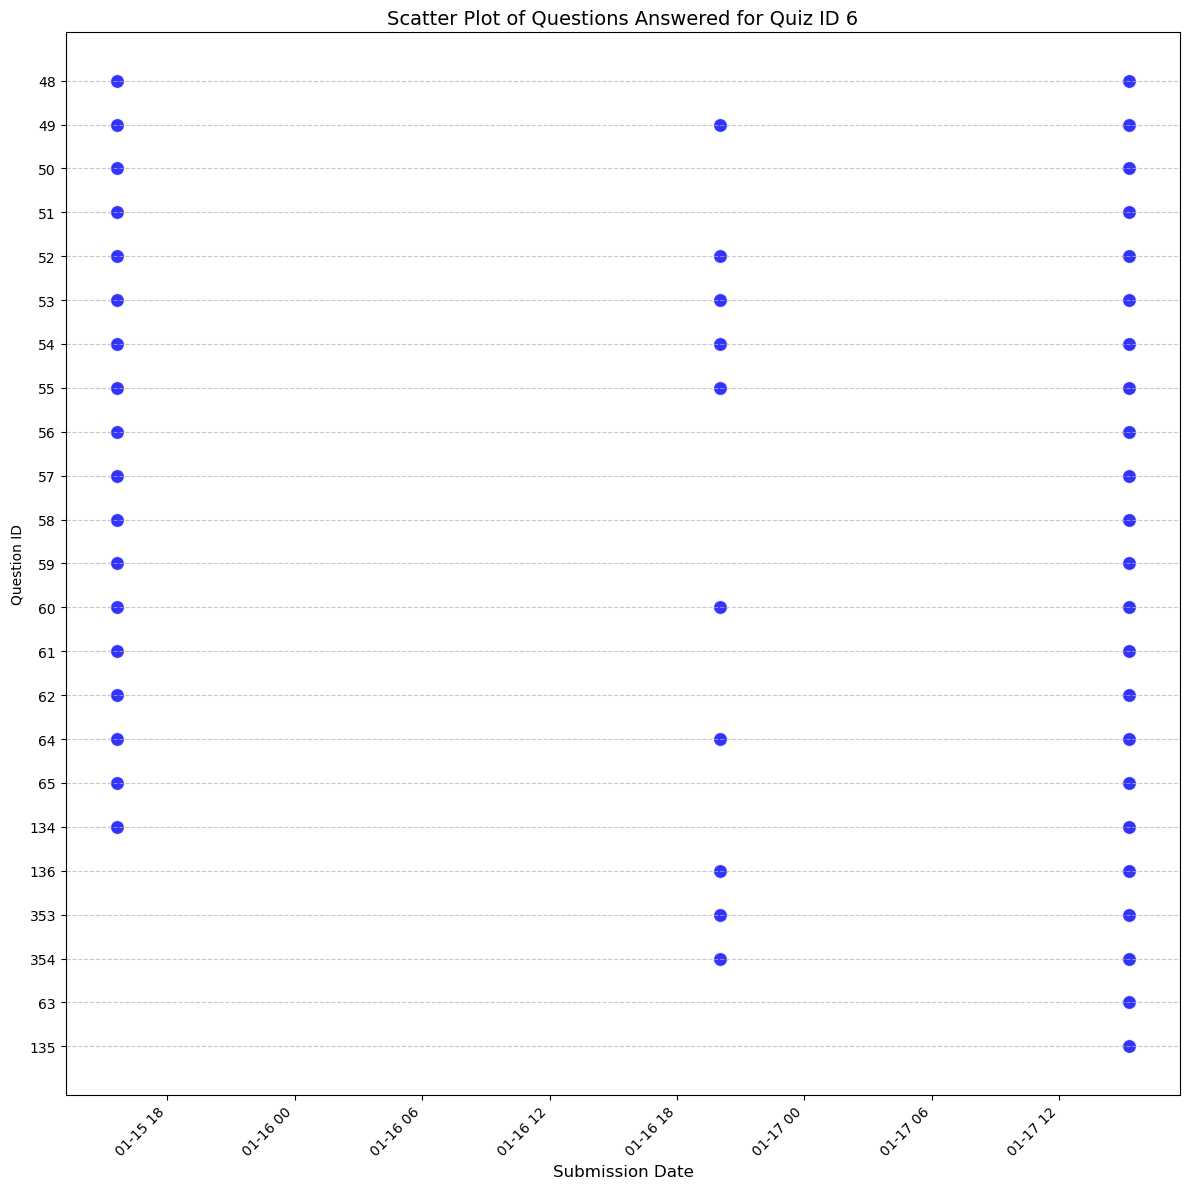

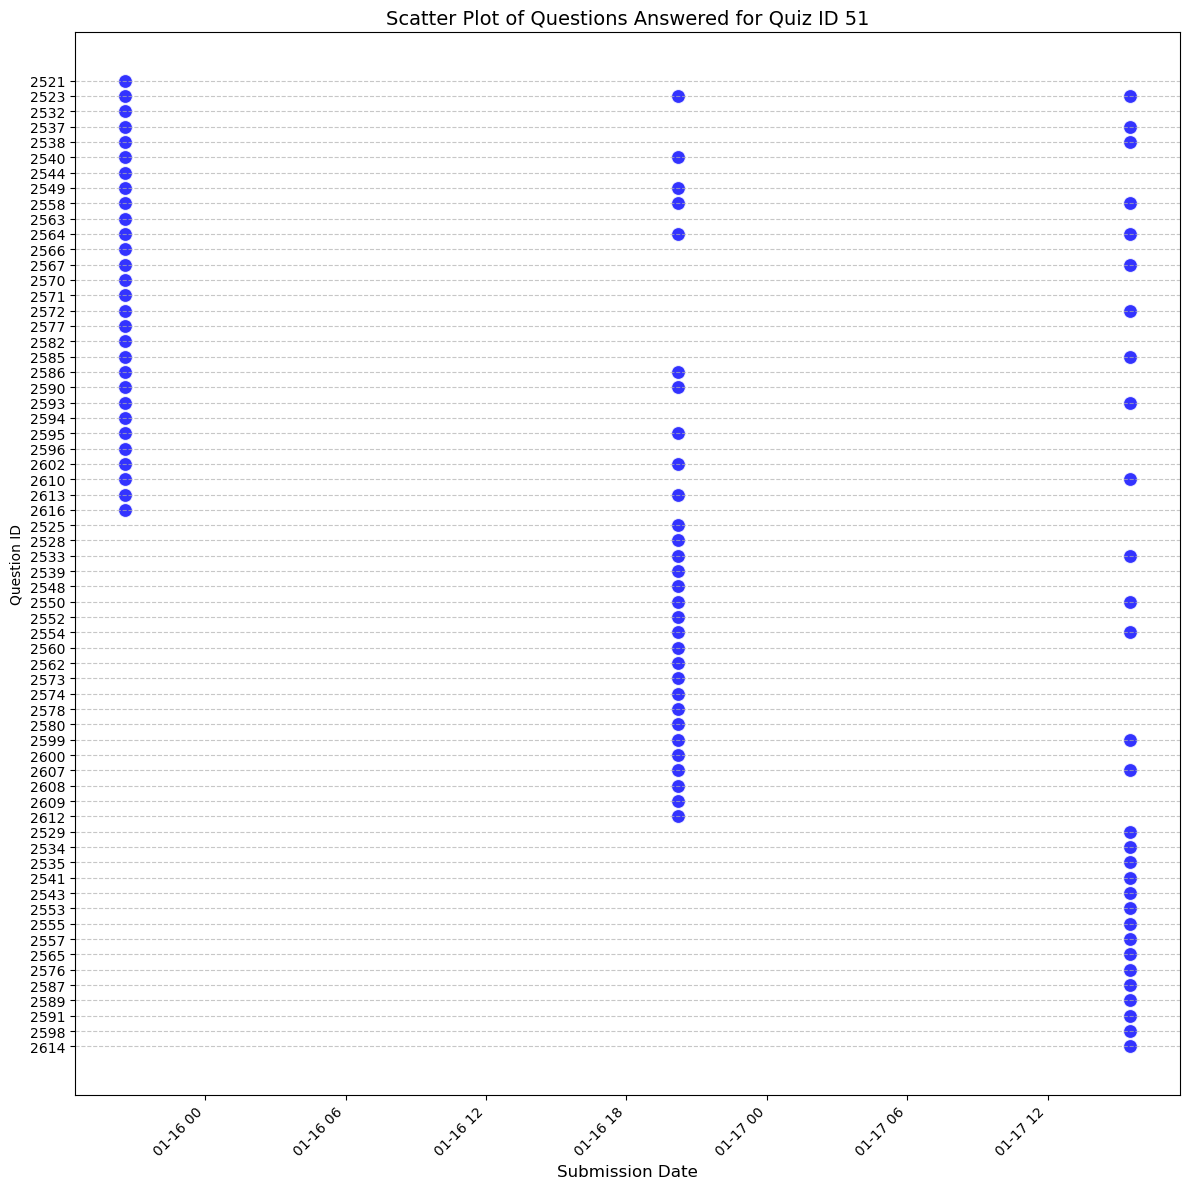

In [31]:



exploded = output_df.explode("response_map")

#  `response_map` is converted to string to preserve exact values in the plot
exploded["response_map"] = exploded["response_map"].astype(str)

# Loop through each unique quiz_id and create a separate plot
unique_quizzes = exploded["quiz_id"].unique()

for quiz_id in unique_quizzes:
    # Filter data for the current quiz
    quiz_data = exploded[exploded["quiz_id"] == quiz_id]
    
    # Scatter plot for the current quiz
    plt.figure(figsize=(12, 12))
    sns.scatterplot(
        data=quiz_data,
        x="submitted_at",  # X-axis for submission date
        y="response_map",  # Y-axis for question ID
        s=100,             # Size of scatter points
        alpha=0.8,         # Transparency for better visualization
        color="blue"       # Use consistent color for simplicity
    )
    
    # Customize the plot
    plt.title(f"Scatter Plot of Questions Answered for Quiz ID {quiz_id}", fontsize=14)
    plt.xlabel("Submission Date", fontsize=12)
    plt.ylabel("Question ID", fontsize=10)
    plt.xticks(rotation=45, ha="right")
    plt.grid(axis="y", linestyle="--", alpha=0.7)
    plt.tight_layout()
    
    # Show the plot
    plt.show()


The scatter plot for response_map shows that the student during multiple attempts of same quiz has not answered the same questions but still some questions are different. 
Insight that can be drawn here-
The student has tried to review or revise the topic so was able to answer different questions from the ealier attempts but at the same time has not studied topic well because some quations answered in the ealier attempts are left out in the later attempts . Also the student has not reviewed or studied on the mistakes in the first attempt because the visualization shows that same questions answered in the first attempt are left out in the later attempts. 
It is very important that students study from their mistakes while preparing for competetive exams like NEET.


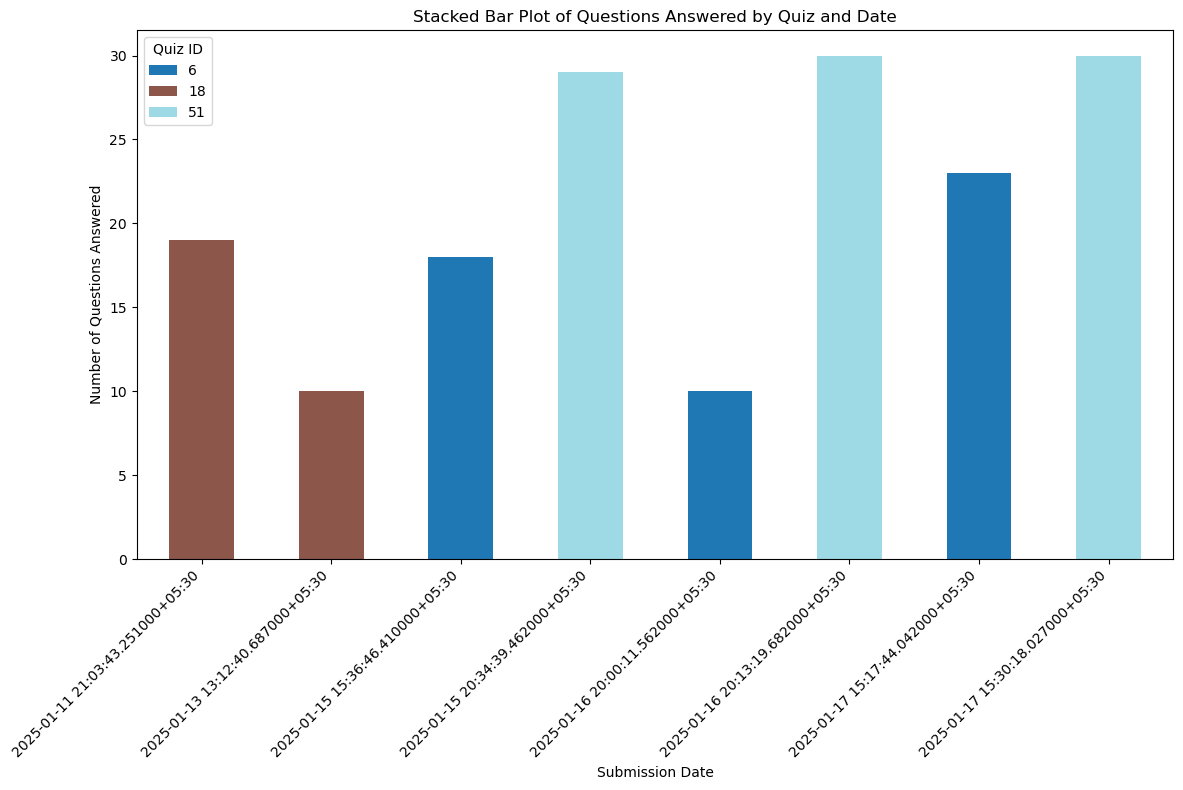

In [32]:
# Create summary data
summary = exploded.groupby(["quiz_id", "submitted_at"]).size().unstack(fill_value=0)

# Plot the stacked bar chart
summary.T.plot(kind="bar", stacked=True, figsize=(12, 8), colormap="tab20")
plt.title("Stacked Bar Plot of Questions Answered by Quiz and Date")
plt.xlabel("Submission Date")
plt.ylabel("Number of Questions Answered")
plt.xticks(rotation=45, ha="right")
plt.legend(title="Quiz ID")
plt.tight_layout()
plt.show()

THis bar graph shows the number of questions answered by the student in multiple attempts.
In quiz_id 18 , the number of questions in second attempt answered is very less compared to first attempt which student has now not reviewed the topic as well as mistakes before the second attempt which is not reccommended at all for preparing for competetive exams. 

For quiz_id 6- The number of questions answered in the last attempt is high compared to first two attempts which shows student might have reviwed some of the topics related to this quiz and also has gone over the mistakes because the response_map plot shows student in the third attempt ahs trie d answer all questions answered in first 2 attempts.

For quiz_id 51 , the number of questions answered is same for all the three attempts but the questions answered are different which shows that the student hasn't gone over mistakes which is the case for many students appearing for competitive examinations. Students should always be encouraged to go over their mistakes and also learn on the same questions in the test first before studying new topics then they get an order for what they have studied, how much they have grasped form their studies and how much they are able to recall from what they have grasped 

 we will also try to plot the performance gap for each quiz beneath the performance gap to compare the two

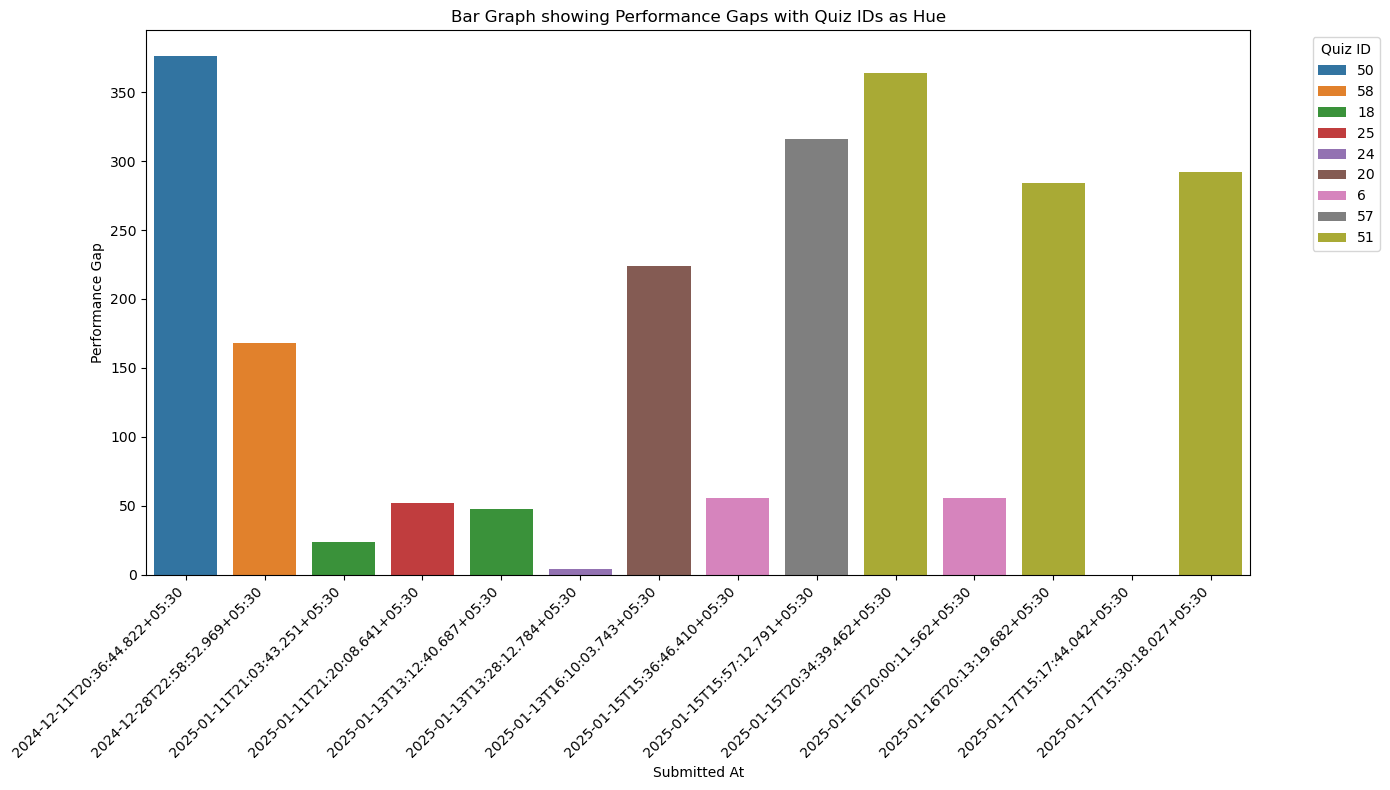

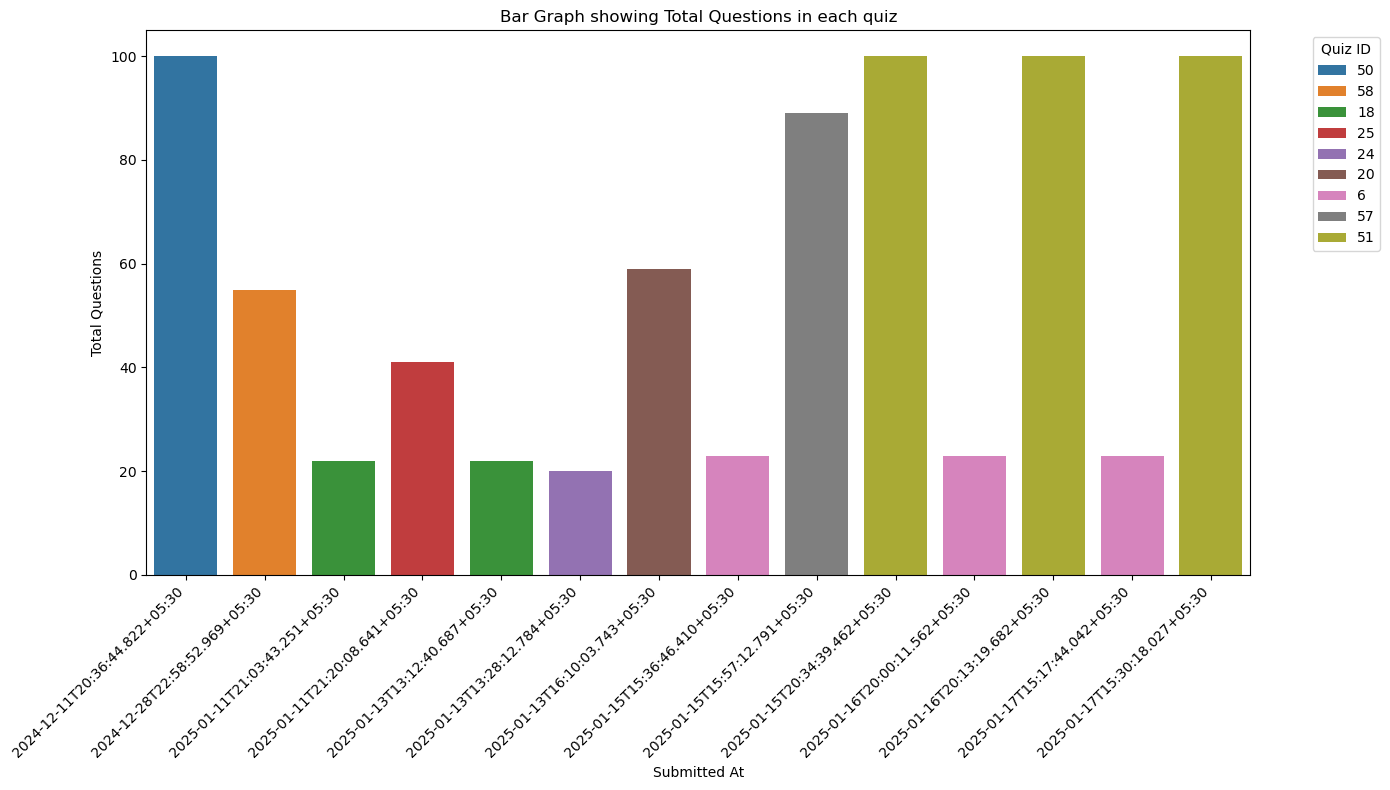

In [36]:
df = pd.read_csv("..\\Data\\student_performance.csv")

# Convert quiz_id to a categorical variable (string)
df["quiz_id"] = df["quiz_id"].astype(str)
df = df.sort_values(by="submitted_at")

# Set the figure size
plt.figure(figsize=(14, 8))  # Width=14, Height=8

# Plot the bar graph with 'sumitted_at' on the x-axis, 'accuracy_percent' on the y-axis, and 'quiz_id' as hue
sns.barplot(data=df, x="submitted_at", y="performance_gap", hue="quiz_id",dodge=False)

# Add labels and title
plt.xlabel("Submitted At")
plt.ylabel("Performance Gap")
plt.title("Bar Graph showing Performance Gaps with Quiz IDs as Hue")

# Rotate the x-axis labels
plt.xticks(rotation=45, ha="right")  # Rotate 45 degrees with right alignment
# Adjust the legend position and font size
plt.legend(title="Quiz ID", bbox_to_anchor=(1.05, 1), loc='upper left', fontsize='medium')

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plot
plt.show()
# Set the figure size
plt.figure(figsize=(14, 8))  # Width=14, Height=8

# Plot the bar graph with 'sumitted_at' on the x-axis, 'accuracy_percent' on the y-axis, and 'quiz_id' as hue
sns.barplot(data=df, x="submitted_at", y="total_questions", hue="quiz_id",dodge=False)

# Add labels and title
plt.xlabel("Submitted At")
plt.ylabel("Total Questions")
plt.title("Bar Graph showing Total Questions in each quiz")

# Rotate the x-axis labels
plt.xticks(rotation=45, ha="right")  # Rotate 45 degrees with right alignment
# Adjust the legend position and font size
plt.legend(title="Quiz ID", bbox_to_anchor=(1.05, 1), loc='upper left', fontsize='medium')

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()

Quiz_id -50 has 100 questions and the performance gap is very high. The student has only taken the quiz one time showing he/she needs to study the topic , review over the mistakes and attempt the quiz again to check on improvement.

Quiz_id -51 has 100  questions , the student has attempted it 3 times and the performance gap in the has decreased by some value which shows student has made some effort to review the topic but  the preformnce gap of the last attempt compared to second is stlightly higher showing student has gone wrong or has still made mistakes on the same questions . Overall the performance gap has not decreased by large amount indicates student needs to put in more effort to study the topic again and again and improvr performance.
Quiz_id -57 has almost 89 questions and performance gap is high and has been attempted just once which shows student hasn't gone through the topic a second time.

The performance gap for quiz_ids -18,6 and 24 are less and the total questions graph shows the number of questions are also less. The student performance in these quizzes are good comparitively showing that the student is a kind of good in these lessons but have spend time on these toipcs focussing on more difficult questions.

Quiz_id -20 , the performance gap is high (200) and number of questions is around 60 , the student has attempted just only one time 

RECOMMENDATION BASED ON DIFFERENT CRITERIA

In [37]:
def suggest_improvements(row):
    """
    Suggest improvements for a quiz taker based on their performance in a given topic.
    """
    # Evaluate accuracy
    if row["accuracy_percent"] < 70:
        improvement_area = "accuracy"
        suggestion = "Focus on improving accuracy in the topic: {}".format(row["topic"])

    # Check for mistakes allowed
    elif row["mistakes_allowed_left"] < 3:
        improvement_area = "mistake tolerance"
        suggestion = "Reduce mistakes in difficult questions for topic: {}".format(row["topic"])

    # Check for performance gaps
    elif row["performance_gap"] > 20:
        improvement_area = "performance gap"
        suggestion = "Focus on bridging the performance gap in the topic: {}".format(row["topic"])

    # General maintenance suggestion
    else:
        improvement_area = "maintenance"
        suggestion = "Maintain high accuracy in quizzes like: {}".format(row["quiz_title"])

    # Add detailed topic-specific advice
    if "key_concepts" in row:
        suggestion += " Review key concepts: {}".format(", ".join(row["key_concepts"]))

    return {"area": improvement_area, "suggestion": suggestion}


SAMPLE DATA -RESULT FROM QUIZ

In [40]:
data_sample = [
    {
        "quiz_title": "Structural Organisation in Animals",
        "topic": "Epithelial Tissue",
        "accuracy_percent": 65,
        "mistakes_allowed_left": 5,
        "performance_gap": 100,
        "key_concepts": ["Free surface", "Basement membrane", "Apical surface"],
    },
    {
        "quiz_title": "Cell Structure",
        "topic": "Cell Organelles",
        "accuracy_percent": 85,
        "mistakes_allowed_left": 2,
        "performance_gap": 250,
        "key_concepts": ["Mitochondria", "Endoplasmic Reticulum"],
    },
]


In [41]:
# Apply the function to each row in the data
for row in data_sample:
    suggestion = suggest_improvements(row)
    print(suggestion)


{'area': 'accuracy', 'suggestion': 'Focus on improving accuracy in the topic: Epithelial Tissue Review key concepts: Free surface, Basement membrane, Apical surface'}
{'area': 'mistake tolerance', 'suggestion': 'Reduce mistakes in difficult questions for topic: Cell Organelles Review key concepts: Mitochondria, Endoplasmic Reticulum'}


We can also use ML models for making recommendations on specific topics based on student accuracy, performance_gap and difficulty level


In [42]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

data=pd.read_csv("..\\Data\\student_performance.csv")
data_extracted = pd.DataFrame(data)

# Prepare a model to predict the improvement area
def train_improvement_model(data):
    # Use features like accuracy, mistakes_left, and performance_gap to train a model
    X = data[["accuracy_percent", "mistakes_allowed_left", "performance_gap"]]
    y = data["topic"]  # Assuming topic is the area we want to improve

    # Train-test split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

    model = RandomForestClassifier()
    model.fit(X_train, y_train)

    # Evaluate the model
    y_pred = model.predict(X_test)
    print(f"Accuracy: {accuracy_score(y_test, y_pred)}")

    return model

# Train the improvement suggestion model
improvement_model = train_improvement_model(data_extracted)

def suggest_improvements_ml(row, model):
    """
    Suggest improvements based on a machine learning model and quiz performance.
    """
    # Predict improvement area using the trained model
    predicted_topic = model.predict([[row["accuracy_percent"], row["mistakes_allowed_left"], row["performance_gap"]]])[0]

    # Generate suggestion
    suggestion = f"Focus on improving in the topic: {predicted_topic}"

    # Add key concepts advice if available
    if "key_concepts" in row:
        suggestion += f" Review key concepts: {', '.join(row['key_concepts'])}"

    return {"suggestion": suggestion}





Accuracy: 0.2


In [45]:
row = data_extracted.iloc[8]  # Example row
improvement_suggestion = suggest_improvements_ml(row, improvement_model)
print(improvement_suggestion)

{'suggestion': 'Focus on improving in the topic: microbes in human welfare'}


c:\Users\jisna\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


Here the ML model will predict which topics need more attention and how to improve based on accuracy, perfromance_gap and mistakes_allowed_left. 